In [30]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
stock_data = "/kaggle/input/stockdata/stock_data.csv"
data = pd.read_csv(stock_data)

# Display the first few rows to understand the structure of the dataset
data.head()


,Date,Ticker,Adj Close,Close,High,Low,Open,Volume
0,2023-07-03,HDFCBANK.NS,1696.631836,1719.800049,1757.500000,1710.000000,1712.500000,22052058.0
1,2023-07-03,INFY.NS,1309.278564,1333.699951,1346.000000,1328.449951,1330.000000,7732412.0
2,2023-07-03,RELIANCE.NS,2405.791992,2414.290283,2420.105225,2358.587158,2361.079346,6077193.0
3,2023-07-03,TCS.NS,3216.993164,3272.300049,3318.800049,3268.750000,3314.300049,1687264.0
4,2023-07-04,HDFCBANK.NS,1704.918579,1728.199951,1747.000000,1713.800049,1723.449951,19397594.0


The dataset contains stock data with the following columns:

Date: The trading date.
Ticker: Stock symbol (e.g., HDFCBANK.NS, INFY.NS).
Adj Close: Adjusted closing price (accounts for splits, dividends).
Close: The raw closing price of the stock on the given day.
High: The highest price during the trading day.
Low: The lowest price during the trading day.
Open: The opening price of the stock.
Volume: Number of shares traded.

In [31]:
# Check for missing values and data types
missing_values = data.isnull().sum()
data_types = data.dtypes

missing_values, data_types

(Date         0
 Ticker       0
 Adj Close    0
 Close        0
 High         0
 Low          0
 Open         0
 Volume       0
 dtype: int64,
 Date          object
 Ticker        object
 Adj Close    float64
 Close        float64
 High         float64
 Low          float64
 Open         float64
 Volume       float64
 dtype: object)

The dataset has no missing values, which is a good starting point for analysis. The data types of the columns are as follows:

Date: Object (should be converted to datetime for time-series analysis).
Ticker: Object (categorical, representing stock symbols).
Adj Close, Close, High, Low, Open: Float64 (numerical data).


In [12]:
# Convert 'Date' to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Generate basic descriptive statistics for numerical columns
descriptive_stats = data.describe()

descriptive_stats

,Date,Adj Close,Close,High,Low,Open,Volume
count,972,972.000000,972.000000,972.000000,972.000000,972.000000,9.720000e+02
mean,2023-12-28 15:06:40,2331.144987,2348.198490,2367.756148,2328.416296,2347.487891,9.199730e+06
min,2023-07-03 00:00:00,1304.812012,1329.150024,1341.900024,1305.000000,1320.199951,7.722910e+05
25%,2023-09-27 00:00:00,1487.235016,1501.674988,1517.037506,1489.187500,1504.074982,3.371086e+06
50%,2023-12-28 00:00:00,1973.128723,1977.974976,2007.750000,1967.050049,1984.500000,5.846881e+06
75%,2024-03-28 00:00:00,3149.300598,3163.075012,3193.787476,3109.062561,3116.775024,1.185393e+07
max,2024-06-28 00:00:00,4188.805176,4219.250000,4254.750000,4177.000000,4215.250000,8.670560e+07
std,NaN,922.665514,927.894765,936.526731,919.210077,927.290255,9.897821e+06


The descriptive statistics of the dataset reveal the following:

Stock Prices (Adj Close, Close, High, Low, Open):

The average adjusted closing price is approximately 2,331.14, with values ranging from 1,304.81 to 4,188.81.
Stock prices show variability with a standard deviation of around 922.67.
The median (50th percentile) adjusted closing price is 1,973.13, suggesting a distribution skewed slightly towards higher prices.
Volume:

The average trading volume is approximately 9.20 million shares, with significant variability (standard deviation: 9.90 million).
The trading volume ranges from about 772,291 to 86.71 million shares, indicating that some stocks are traded more actively than others.

In [32]:
# Replace infinte values with NaN because of warnings
data.replace([np.inf, -np.inf], np.nan, inplace=True)

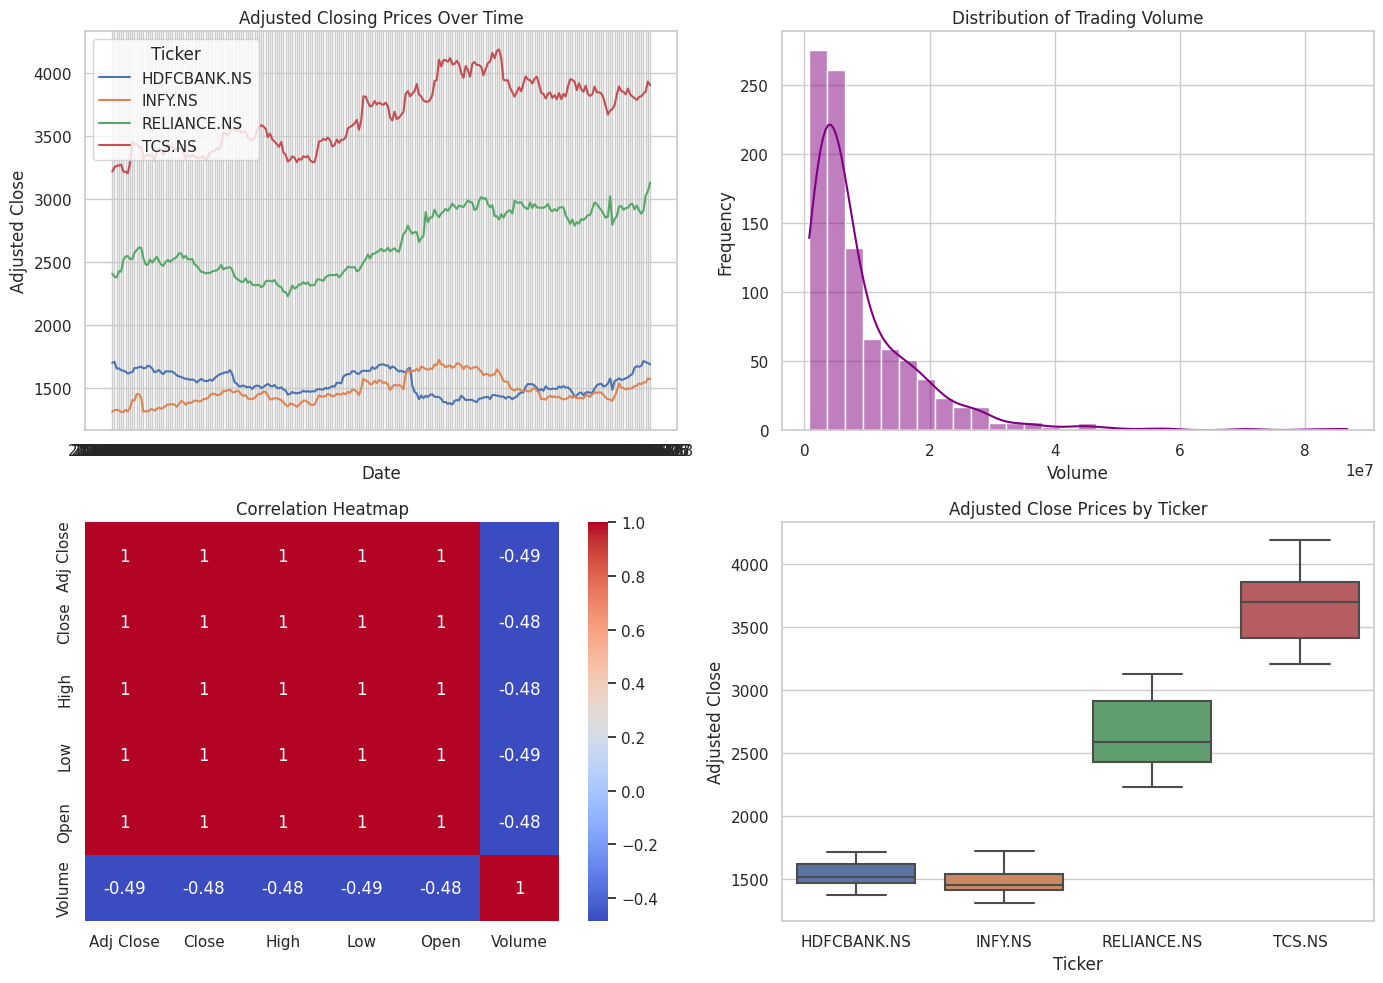

In [33]:
# Set plot style for better visuals
sns.set(style="whitegrid")

# Create a figure for subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plotting the adjusted closing prices over time for all stocks
sns.lineplot(data=data, x='Date', y='Adj Close', hue='Ticker', ax=axes[0, 0])
axes[0, 0].set_title('Adjusted Closing Prices Over Time')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Adjusted Close')

# Plotting distribution of trading volumes
sns.histplot(data['Volume'], bins=30, kde=True, ax=axes[0, 1], color='purple')
axes[0, 1].set_title('Distribution of Trading Volume')
axes[0, 1].set_xlabel('Volume')
axes[0, 1].set_ylabel('Frequency')

# Correlation heatmap for numerical variables
corr = data[['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', ax=axes[1, 0])
axes[1, 0].set_title('Correlation Heatmap')

# Boxplot for stock prices to identify potential outliers
sns.boxplot(data=data, x='Ticker', y='Adj Close', ax=axes[1, 1])
axes[1, 1].set_title('Adjusted Close Prices by Ticker')
axes[1, 1].set_xlabel('Ticker')
axes[1, 1].set_ylabel('Adjusted Close')

plt.tight_layout()
plt.show()

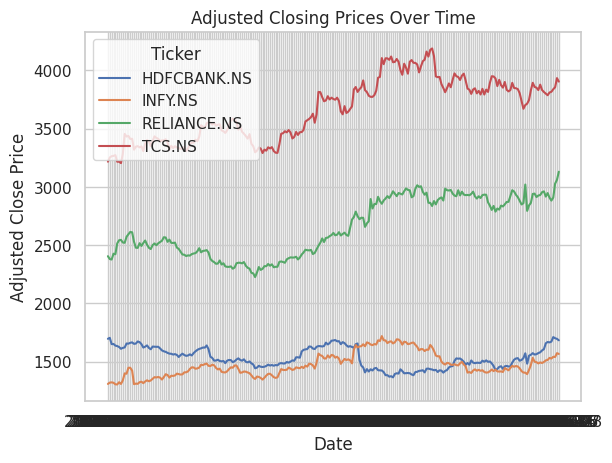

In [34]:
import warnings

# Suppress FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Replace infinite values with NaN
data.replace([float('inf'), float('-inf')], pd.NA, inplace=True)

# Plot Adjusted Close prices over time
sns.lineplot(data=data, x='Date', y='Adj Close', hue='Ticker')
plt.title('Adjusted Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.show()


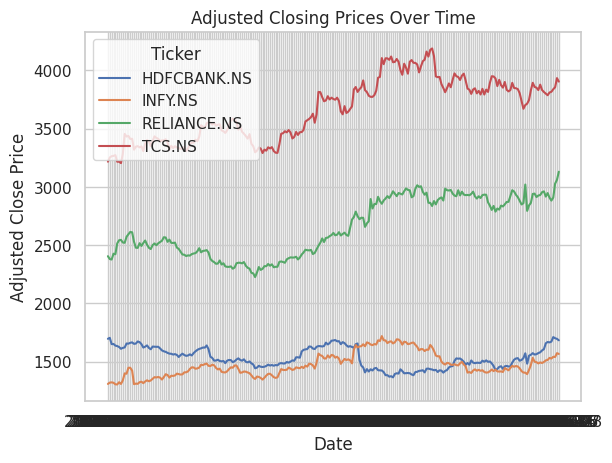

In [35]:
# Plot Adjusted Close prices over time
sns.lineplot(data=data, x='Date', y='Adj Close', hue='Ticker')
plt.title('Adjusted Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.show()

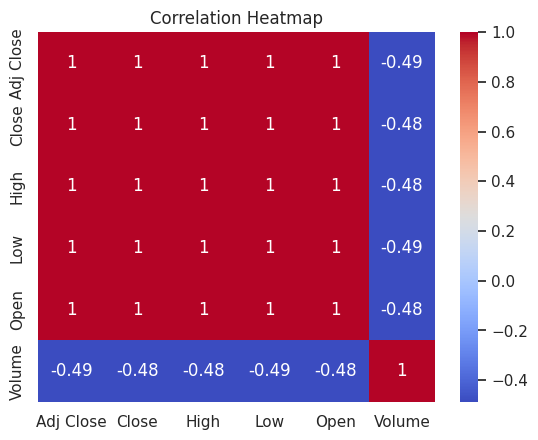

In [36]:
corr = data[['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


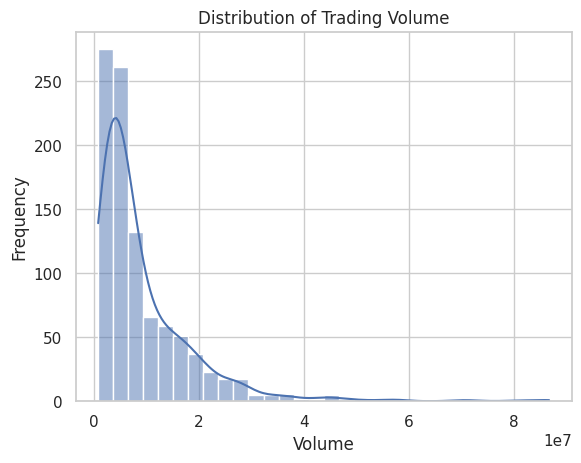

In [37]:
sns.histplot(data['Volume'], bins=30, kde=True)
plt.title('Distribution of Trading Volume')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.show()


## HDFC BANK STOCK

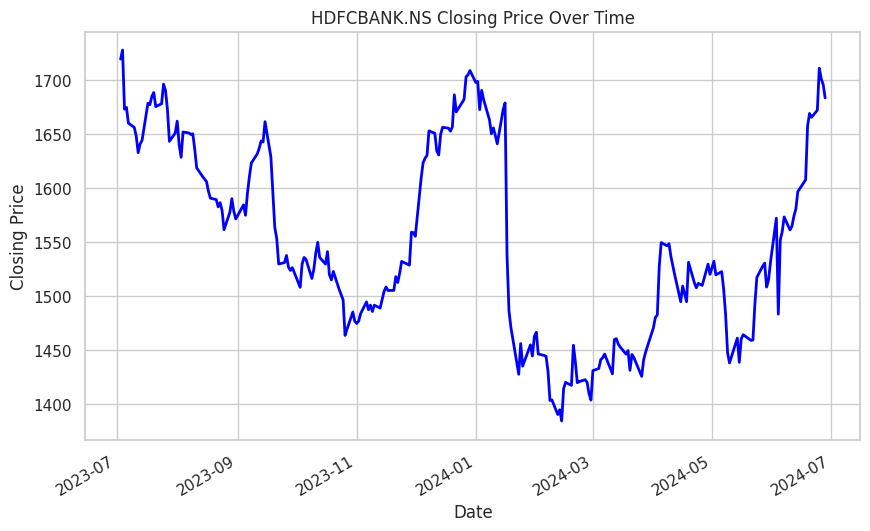

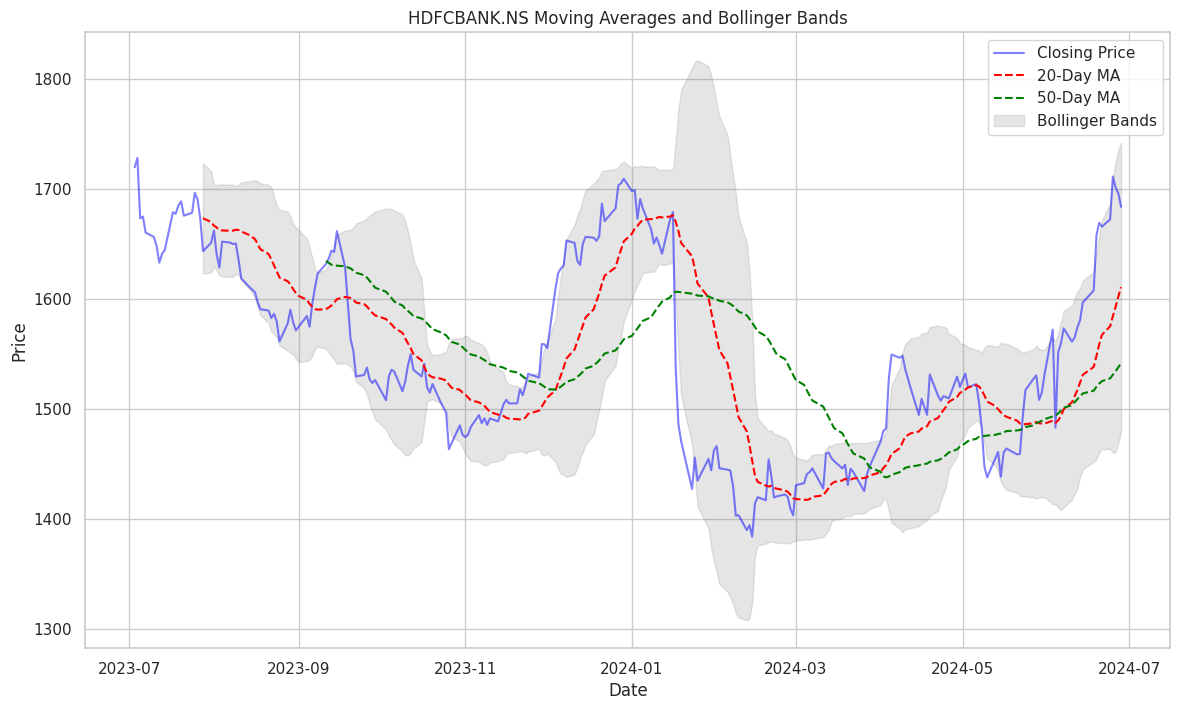

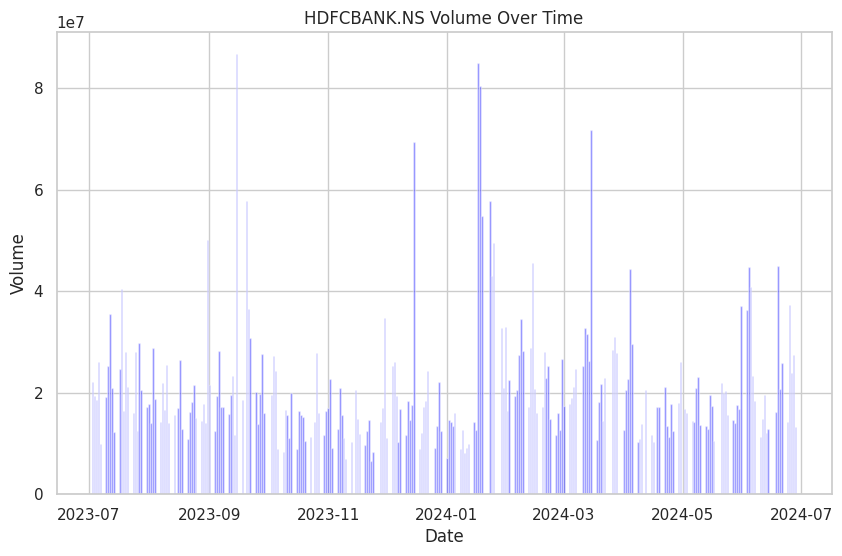

In [38]:
# Filter data for the HDFC Bank stock 
hdfcbank_data = data[data['Ticker'] == 'HDFCBANK.NS'].copy()

# Convert 'Date' column to datetime format and set it as index
hdfcbank_data['Date'] = pd.to_datetime(hdfcbank_data['Date'])
hdfcbank_data.set_index('Date', inplace=True)

# Plot the closing price over time
plt.figure(figsize=(10, 6))
hdfcbank_data['Close'].plot(title='HDFCBANK.NS Closing Price Over Time', color='blue', lw=2)
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()

# Calculate Moving Averages (20-day and 50-day)
hdfcbank_data['MA20'] = hdfcbank_data['Close'].rolling(window=20).mean()
hdfcbank_data['MA50'] = hdfcbank_data['Close'].rolling(window=50).mean()

# Calculate Bollinger Bands
hdfcbank_data['BB_Middle'] = hdfcbank_data['MA20']  # Middle Bollinger Band (20-day MA)
hdfcbank_data['BB_Upper'] = hdfcbank_data['BB_Middle'] + (2 * hdfcbank_data['Close'].rolling(window=20).std())
hdfcbank_data['BB_Lower'] = hdfcbank_data['BB_Middle'] - (2 * hdfcbank_data['Close'].rolling(window=20).std())

# Plot Moving Averages and Bollinger Bands
plt.figure(figsize=(14, 8))
plt.plot(hdfcbank_data['Close'], label='Closing Price', color='blue', alpha=0.5)
plt.plot(hdfcbank_data['MA20'], label='20-Day MA', color='red', linestyle='--')
plt.plot(hdfcbank_data['MA50'], label='50-Day MA', color='green', linestyle='--')

# Fill Bollinger Bands
plt.fill_between(hdfcbank_data.index, hdfcbank_data['BB_Upper'], hdfcbank_data['BB_Lower'], color='gray', alpha=0.2, label='Bollinger Bands')

plt.title('HDFCBANK.NS Moving Averages and Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# Volume Analysis
plt.figure(figsize=(10, 6))
plt.bar(hdfcbank_data.index, hdfcbank_data['Volume'], color='blue', alpha=0.5)
plt.title('HDFCBANK.NS Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.show()


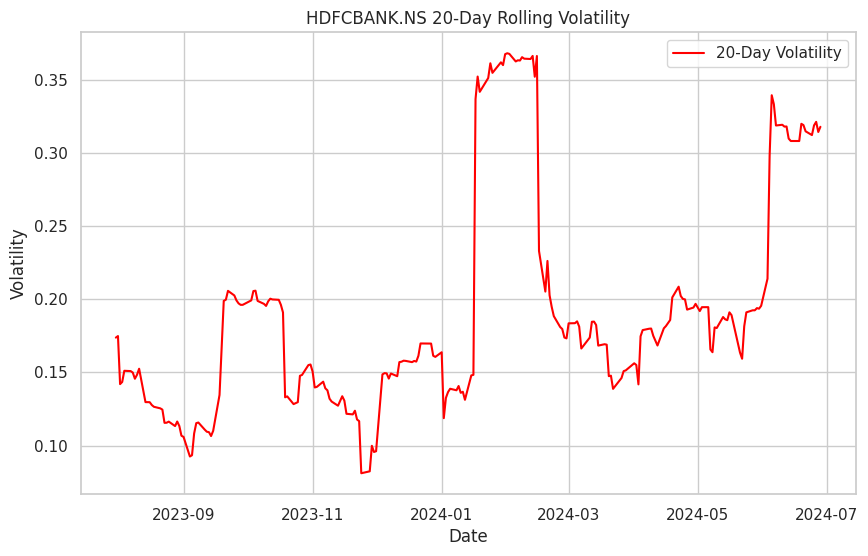

In [39]:

# Calculate daily returns for HDFC Bank
hdfcbank_data['Returns'] = hdfcbank_data['Close'].pct_change()

# Calculate rolling volatility (e.g., 20-day standard deviation of returns)
hdfcbank_data['Volatility'] = hdfcbank_data['Returns'].rolling(window=20).std() * (252**0.5)  # Annualize the volatility

# Plot the Volatility
plt.figure(figsize=(10, 6))

#plt.plot(hdfcbank_data['Close'], label='Closing Price', color='blue', alpha=0.5)
plt.plot(hdfcbank_data.index, hdfcbank_data['Volatility'], color='red', label='20-Day Volatility')
plt.title('HDFCBANK.NS 20-Day Rolling Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.grid(True)
plt.legend()
plt.show()


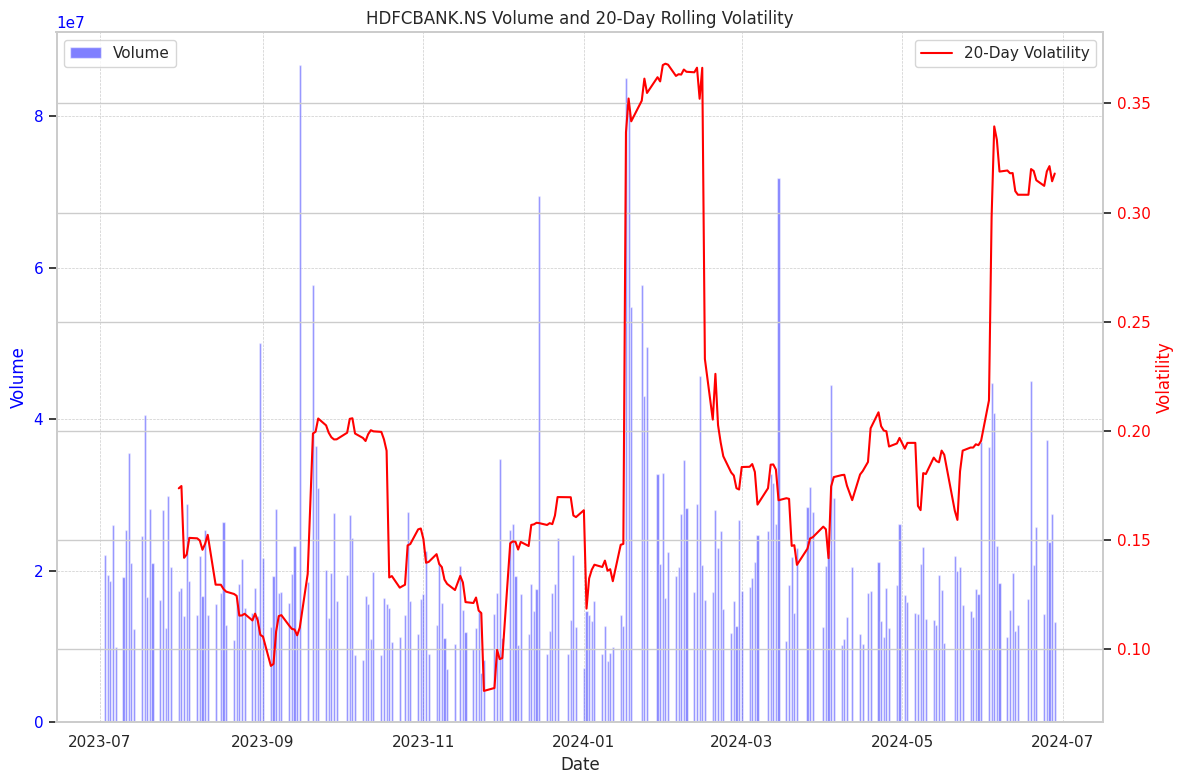

In [40]:
# Calculate daily returns for HDFC Bank
hdfcbank_data['Returns'] = hdfcbank_data['Close'].pct_change()

# Calculate rolling volatility (e.g., 20-day standard deviation of returns)
hdfcbank_data['Volatility'] = hdfcbank_data['Returns'].rolling(window=20).std() * (252**0.5)  # Annualize the volatility

# Create the figure and primary axis
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot Volume on the primary y-axis
ax1.bar(hdfcbank_data.index, hdfcbank_data['Volume'], color='blue', alpha=0.5, label='Volume')
ax1.set_xlabel('Date')
ax1.set_ylabel('Volume', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)

# Create a secondary y-axis to plot the Volatility
ax2 = ax1.twinx()
ax2.plot(hdfcbank_data.index, hdfcbank_data['Volatility'], color='red', label='20-Day Volatility')
ax2.set_ylabel('Volatility', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Titles and legends
plt.title('HDFCBANK.NS Volume and 20-Day Rolling Volatility')
fig.tight_layout()
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()


## INFOSYS STOCK

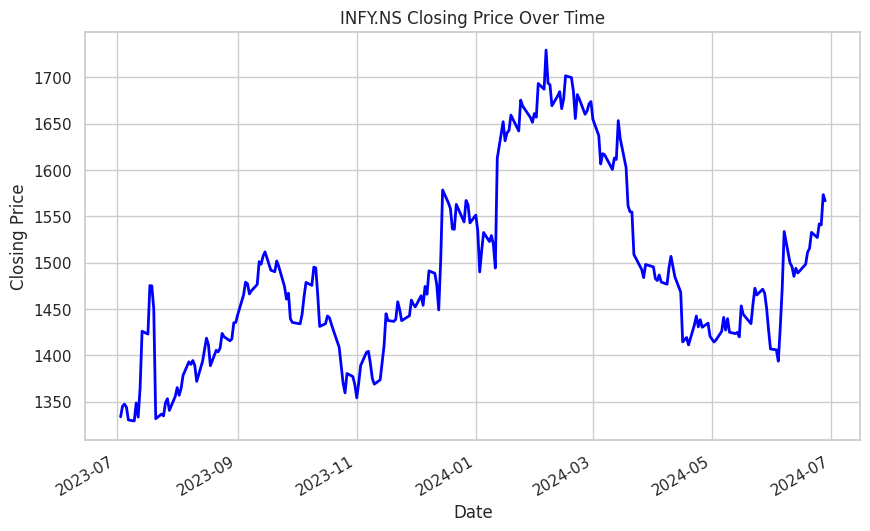

In [41]:
# Filter data for the Infosys stock 
infosys_data = data[data['Ticker'] == 'INFY.NS'].copy()

# Convert 'Date' column to datetime format and set it as index
infosys_data['Date'] = pd.to_datetime(infosys_data['Date'])
infosys_data.set_index('Date', inplace=True)

# Plot the closing price over time
plt.figure(figsize=(10, 6))
infosys_data['Close'].plot(title='INFY.NS Closing Price Over Time', color='blue', lw=2)
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()


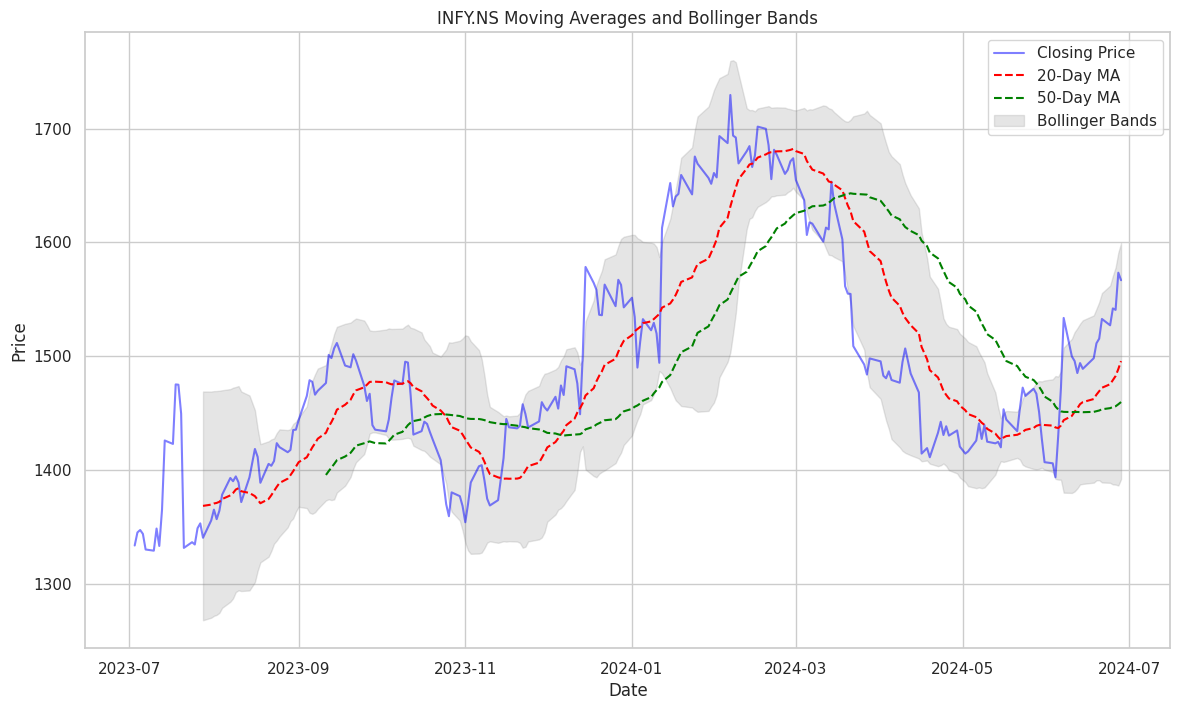

In [42]:


# Calculate Moving Averages (20-day and 50-day) for Infosys
infosys_data['MA20'] = infosys_data['Close'].rolling(window=20).mean()
infosys_data['MA50'] = infosys_data['Close'].rolling(window=50).mean()

# Calculate Bollinger Bands
infosys_data['BB_Middle'] = infosys_data['MA20']  # Middle Bollinger Band (20-day MA)
infosys_data['BB_Upper'] = infosys_data['BB_Middle'] + (2 * infosys_data['Close'].rolling(window=20).std())
infosys_data['BB_Lower'] = infosys_data['BB_Middle'] - (2 * infosys_data['Close'].rolling(window=20).std())

# Plot Moving Averages and Bollinger Bands
plt.figure(figsize=(14, 8))
plt.plot(infosys_data['Close'], label='Closing Price', color='blue', alpha=0.5)
plt.plot(infosys_data['MA20'], label='20-Day MA', color='red', linestyle='--')
plt.plot(infosys_data['MA50'], label='50-Day MA', color='green', linestyle='--')

# Fill Bollinger Bands
plt.fill_between(infosys_data.index, infosys_data['BB_Upper'], infosys_data['BB_Lower'], color='gray', alpha=0.2, label='Bollinger Bands')

plt.title('INFY.NS Moving Averages and Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='best')
plt.grid(True)
plt.show()


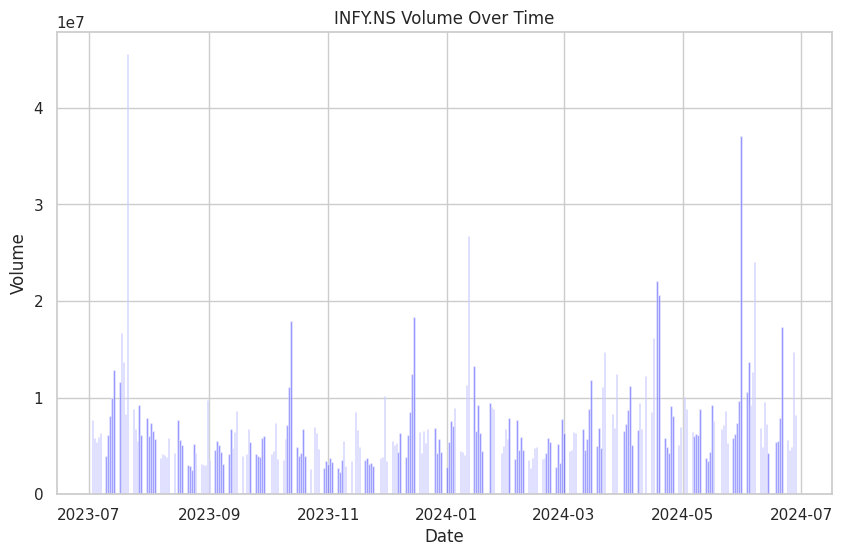

In [43]:
# Volume Analysis for Infosys Stock
plt.figure(figsize=(10, 6))
plt.bar(infosys_data.index, infosys_data['Volume'], color='blue', alpha=0.5)
plt.title('INFY.NS Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.show()

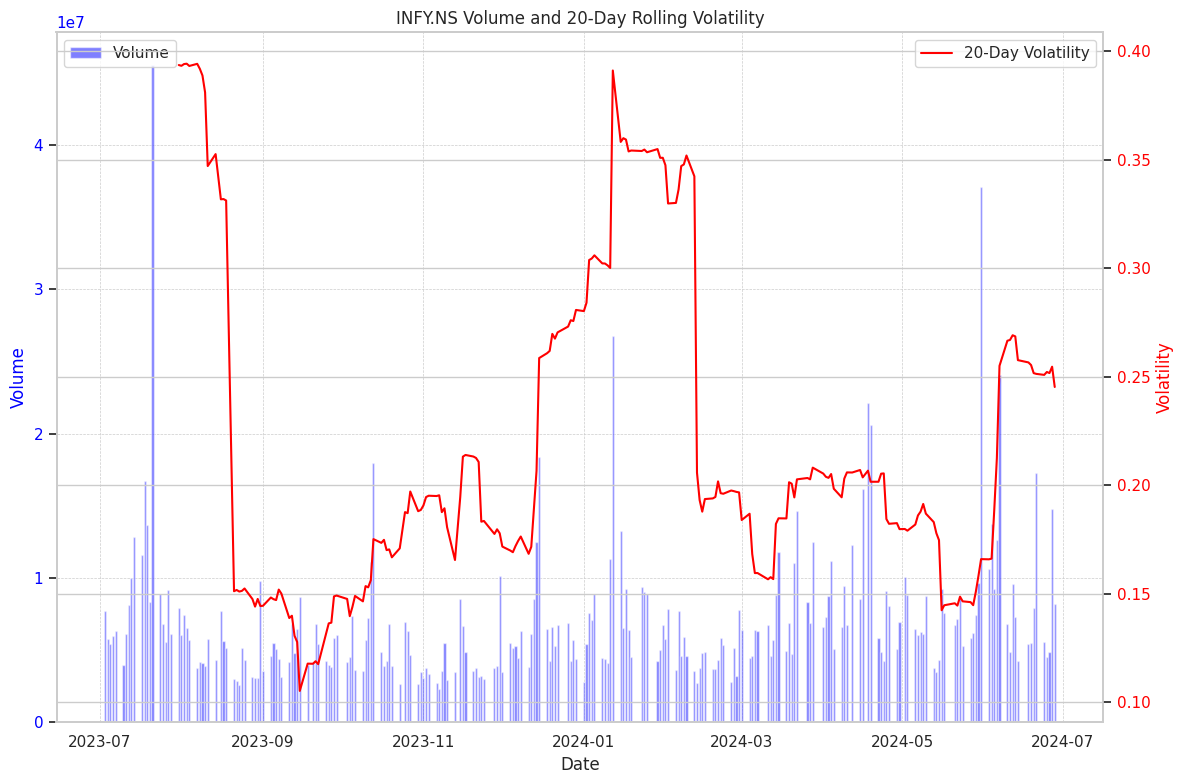

In [44]:

# Calculate daily returns for Infoysy Stock
infosys_data['Returns'] = infosys_data['Close'].pct_change()

# Calculate rolling volatility (e.g., 20-day standard deviation of returns)
infosys_data['Volatility'] = infosys_data['Returns'].rolling(window=20).std() * (252**0.5)  # Annualize the volatility

# Create the figure and primary axis
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot Volume on the primary y-axis
ax1.bar(infosys_data.index, infosys_data['Volume'], color='blue', alpha=0.5, label='Volume')
ax1.set_xlabel('Date')
ax1.set_ylabel('Volume', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)

# Create a secondary y-axis to plot the Volatility
ax2 = ax1.twinx()
ax2.plot(infosys_data.index, infosys_data['Volatility'], color='red', label='20-Day Volatility')
ax2.set_ylabel('Volatility', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Titles and legends
plt.title('INFY.NS Volume and 20-Day Rolling Volatility')
fig.tight_layout()
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

## RELIANCE STOCK

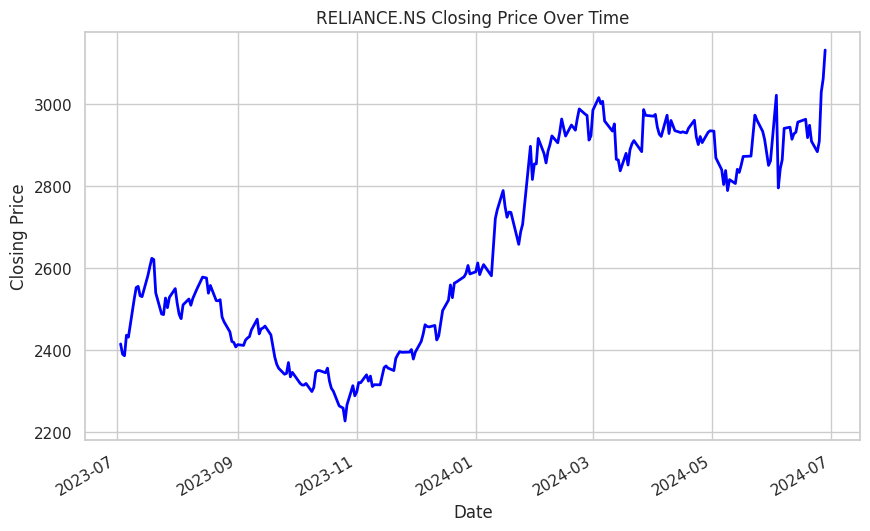

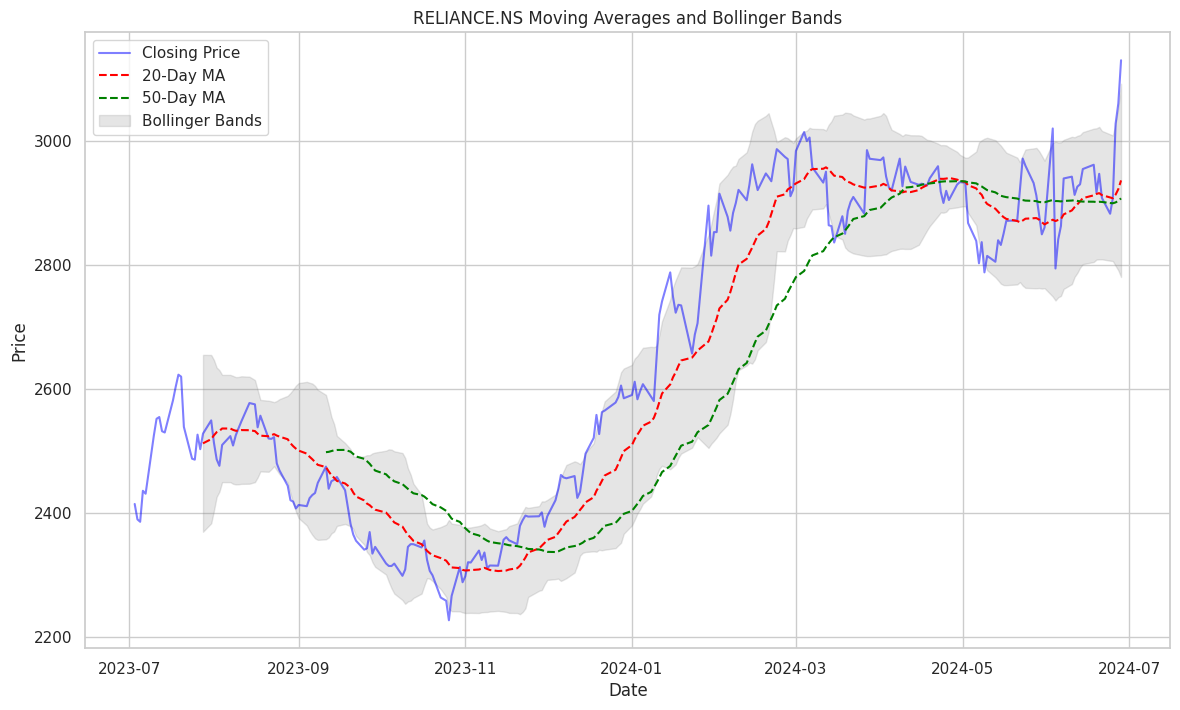

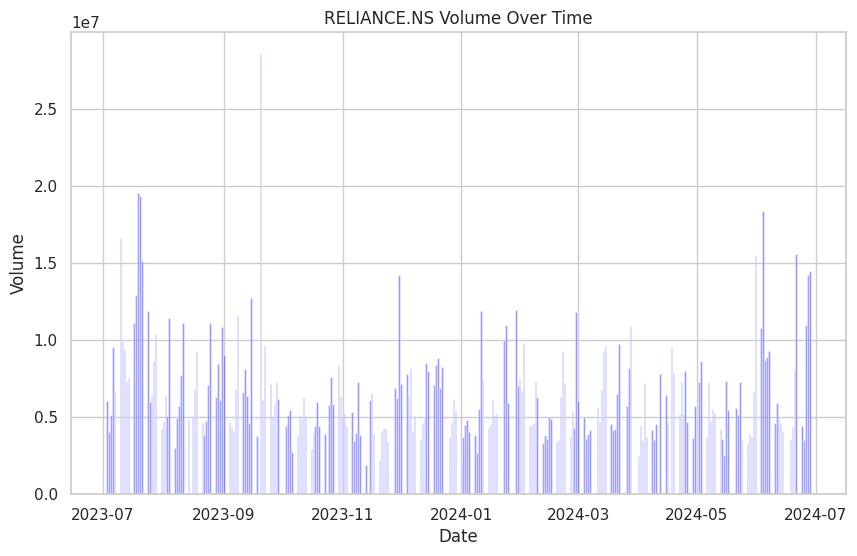

In [45]:
# Filter data for the Reliance stock 
reliance_data = data[data['Ticker'] == 'RELIANCE.NS'].copy()

# Convert 'Date' column to datetime format and set it as index
reliance_data['Date'] = pd.to_datetime(reliance_data['Date'])
reliance_data.set_index('Date', inplace=True)

# Plot the closing price over time
plt.figure(figsize=(10, 6))
reliance_data['Close'].plot(title='RELIANCE.NS Closing Price Over Time', color='blue', lw=2)
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()

# Calculate Moving Averages (20-day and 50-day)
reliance_data['MA20'] = reliance_data['Close'].rolling(window=20).mean()
reliance_data['MA50'] = reliance_data['Close'].rolling(window=50).mean()

# Calculate Bollinger Bands
reliance_data['BB_Middle'] = reliance_data['MA20']  # Middle Bollinger Band (20-day MA)
reliance_data['BB_Upper'] = reliance_data['BB_Middle'] + (2 * reliance_data['Close'].rolling(window=20).std())
reliance_data['BB_Lower'] = reliance_data['BB_Middle'] - (2 * reliance_data['Close'].rolling(window=20).std())

# Plot Moving Averages and Bollinger Bands
plt.figure(figsize=(14, 8))
plt.plot(reliance_data['Close'], label='Closing Price', color='blue', alpha=0.5)
plt.plot(reliance_data['MA20'], label='20-Day MA', color='red', linestyle='--')
plt.plot(reliance_data['MA50'], label='50-Day MA', color='green', linestyle='--')

# Fill Bollinger Bands
plt.fill_between(reliance_data.index, reliance_data['BB_Upper'], reliance_data['BB_Lower'], color='gray', alpha=0.2, label='Bollinger Bands')

plt.title('RELIANCE.NS Moving Averages and Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# Volume Analysis
plt.figure(figsize=(10, 6))
plt.bar(reliance_data.index, reliance_data['Volume'], color='blue', alpha=0.5)
plt.title('RELIANCE.NS Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.show()

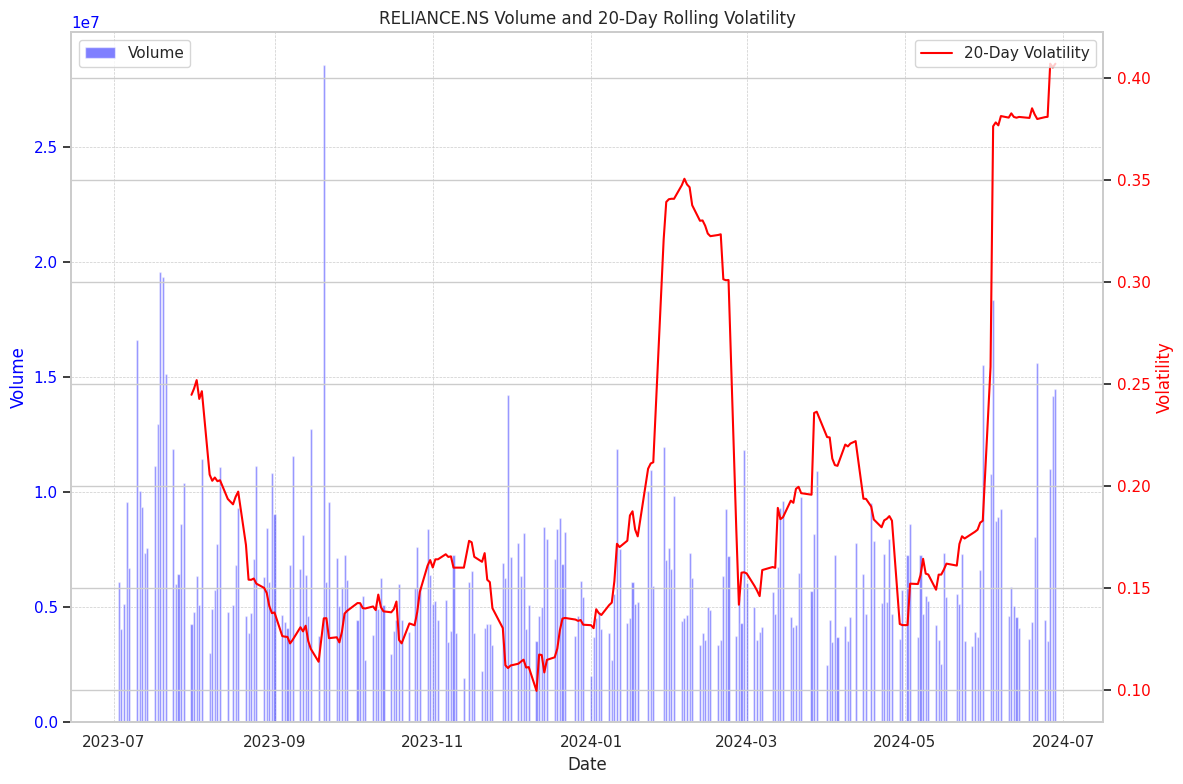

In [46]:

# Calculate daily returns for Reliance Stock
reliance_data['Returns'] = reliance_data['Close'].pct_change()

# Calculate rolling volatility (e.g., 20-day standard deviation of returns)
reliance_data['Volatility'] = reliance_data['Returns'].rolling(window=20).std() * (252**0.5)  # Annualize the volatility

# Create the figure and primary axis
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot Volume on the primary y-axis
ax1.bar(reliance_data.index, reliance_data['Volume'], color='blue', alpha=0.5, label='Volume')
ax1.set_xlabel('Date')
ax1.set_ylabel('Volume', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)

# Create a secondary y-axis to plot the Volatility
ax2 = ax1.twinx()
ax2.plot(reliance_data.index, reliance_data['Volatility'], color='red', label='20-Day Volatility')
ax2.set_ylabel('Volatility', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Titles and legends
plt.title('RELIANCE.NS Volume and 20-Day Rolling Volatility')
fig.tight_layout()
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

## TCS STOCK

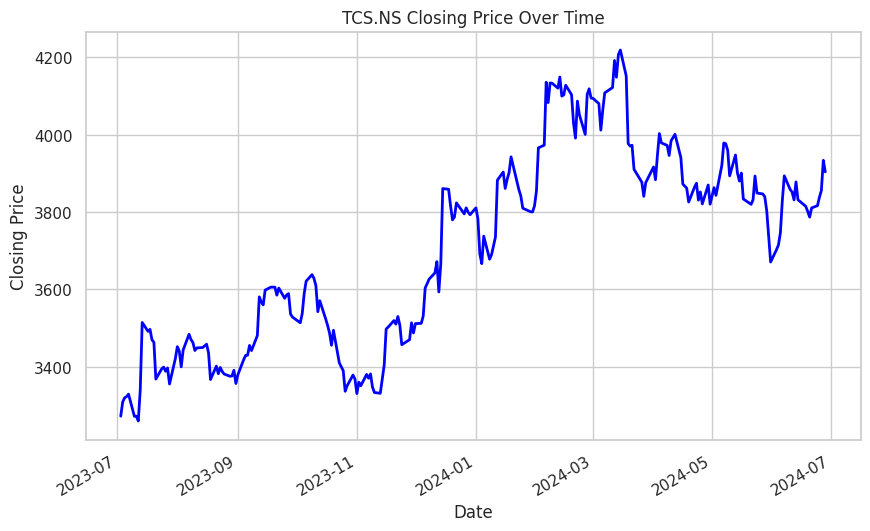

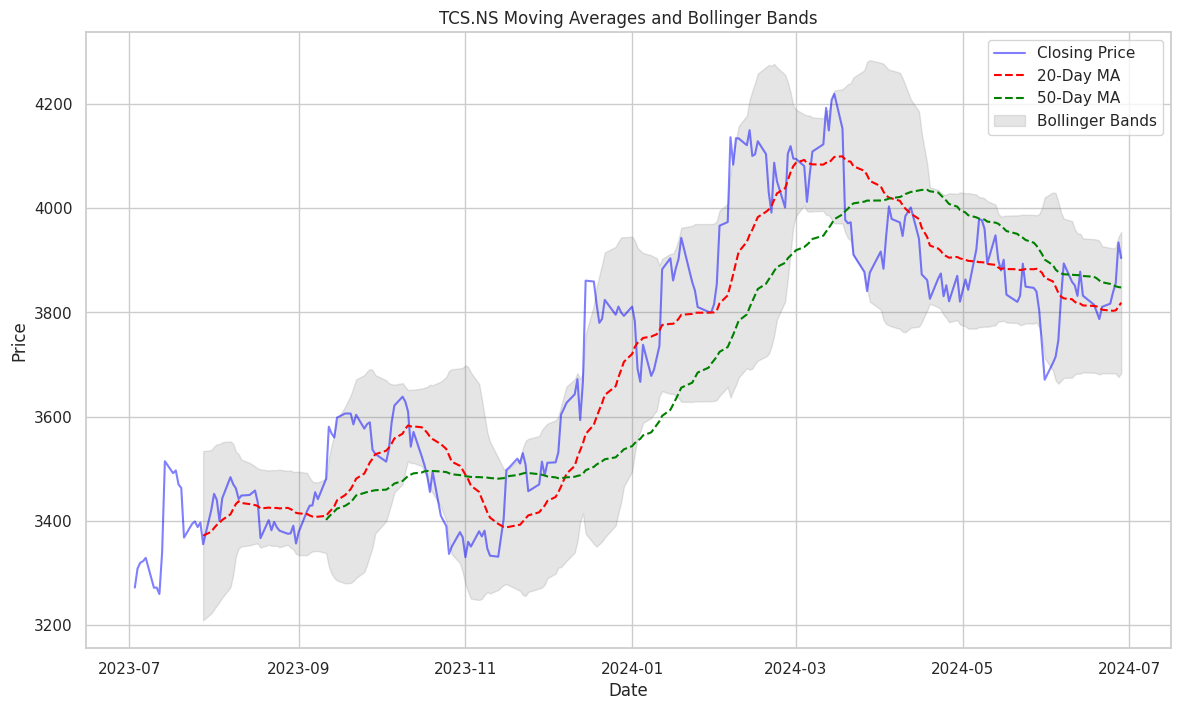

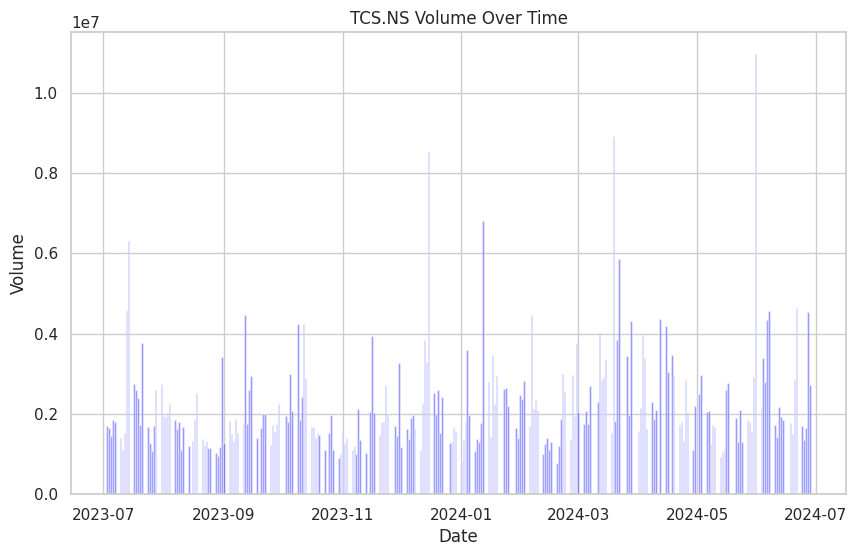

In [47]:
# Filter data for the TCS stock 
tcs_data = data[data['Ticker'] == 'TCS.NS'].copy()

# Convert 'Date' column to datetime format and set it as index
tcs_data['Date'] = pd.to_datetime(tcs_data['Date'])
tcs_data.set_index('Date', inplace=True)

# Plot the closing price over time
plt.figure(figsize=(10, 6))
tcs_data['Close'].plot(title='TCS.NS Closing Price Over Time', color='blue', lw=2)
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()

# Calculate Moving Averages (20-day and 50-day)
tcs_data['MA20'] = tcs_data['Close'].rolling(window=20).mean()
tcs_data['MA50'] = tcs_data['Close'].rolling(window=50).mean()

# Calculate Bollinger Bands
tcs_data['BB_Middle'] = tcs_data['MA20']  # Middle Bollinger Band (20-day MA)
tcs_data['BB_Upper'] = tcs_data['BB_Middle'] + (2 * tcs_data['Close'].rolling(window=20).std())
tcs_data['BB_Lower'] = tcs_data['BB_Middle'] - (2 * tcs_data['Close'].rolling(window=20).std())

# Plot Moving Averages and Bollinger Bands
plt.figure(figsize=(14, 8))
plt.plot(tcs_data['Close'], label='Closing Price', color='blue', alpha=0.5)
plt.plot(tcs_data['MA20'], label='20-Day MA', color='red', linestyle='--')
plt.plot(tcs_data['MA50'], label='50-Day MA', color='green', linestyle='--')

# Fill Bollinger Bands
plt.fill_between(tcs_data.index, tcs_data['BB_Upper'], tcs_data['BB_Lower'], color='gray', alpha=0.2, label='Bollinger Bands')

plt.title('TCS.NS Moving Averages and Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# Volume Analysis
plt.figure(figsize=(10, 6))
plt.bar(tcs_data.index, tcs_data['Volume'], color='blue', alpha=0.5)
plt.title('TCS.NS Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.show()

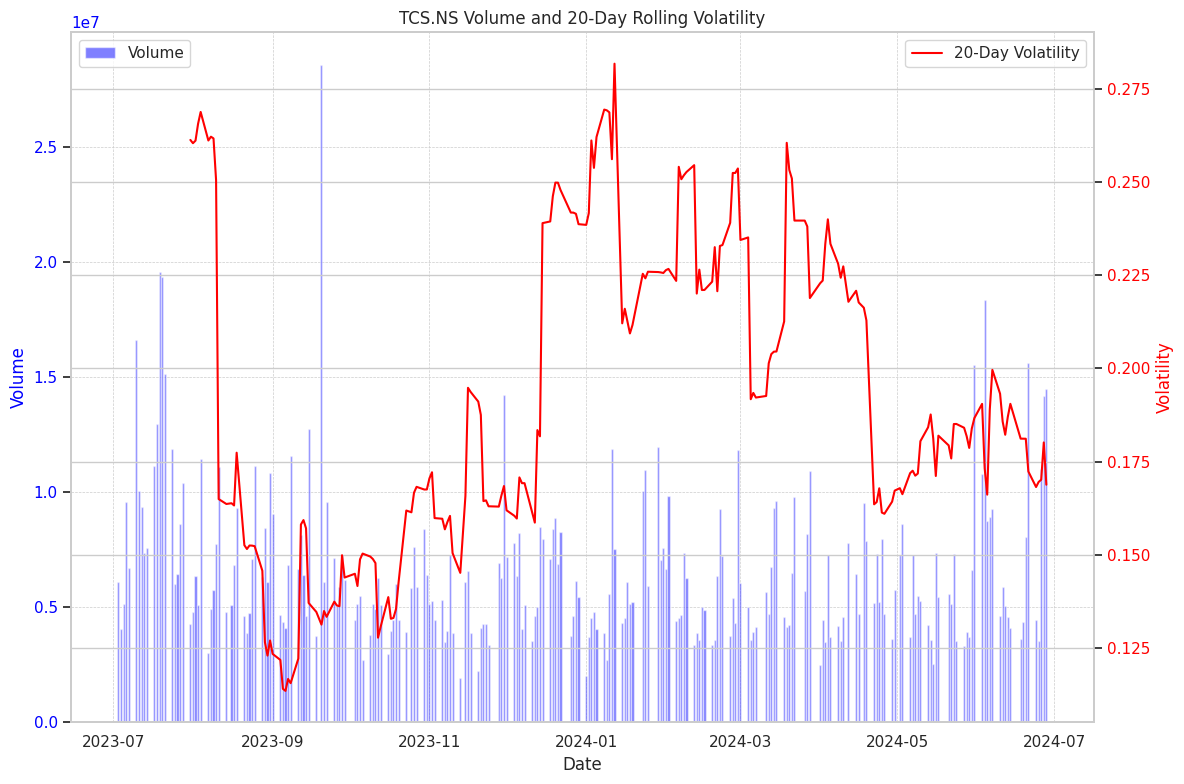

In [48]:

# Calculate daily returns of TCS Bank
tcs_data['Returns'] = tcs_data['Close'].pct_change()

# Calculate rolling volatility (e.g., 20-day standard deviation of returns)
tcs_data['Volatility'] = tcs_data['Returns'].rolling(window=20).std() * (252**0.5)  # Annualize the volatility

# Create the figure and primary axis
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot Volume on the primary y-axis
ax1.bar(tcs_data.index, reliance_data['Volume'], color='blue', alpha=0.5, label='Volume')
ax1.set_xlabel('Date')
ax1.set_ylabel('Volume', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)

# Create a secondary y-axis to plot the Volatility
ax2 = ax1.twinx()
ax2.plot(tcs_data.index, tcs_data['Volatility'], color='red', label='20-Day Volatility')
ax2.set_ylabel('Volatility', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Titles and legends
plt.title('TCS.NS Volume and 20-Day Rolling Volatility')
fig.tight_layout()
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()